# Math Foundations

Introduction

## Graph-theoretic Concepts

1. For this exercise we will use datasets CAMPNET and ZACKAR. 
    1. CAMPNET. This is a network of 18 participants in a qualitative methods class. Ties are directed and represent that the ego indicated that the nominated alter was one of the three people with which s/he spent the most time during the seminar. 
    2. ZACKAR. These are data collected from the members of a university karate club by Wayne Zachary. The ZACHE matrix represents the presence or absence of ties among the members of the club; the ZACHC matrix indicates the relative strength of the associations (number of situations in and outside the club in which interactions occurred).
2. Calculate overall density of the ZACKAR networks
3. Now calculate and interpret the density of the CAMPNET network. Does it make sense to look at the density of this dataset?
4. Calculate the number of weak AND strong components in the CAMPNET dataset. 
5. Use UCInet to trace all paths between two nodes in CAMPNET. Kudos to whomever can find the longest path between two actors in this dataset. Make sure to find two actors who have a path. You may also be able to use NetDraw to identify some actors that have long paths between them.
6. Use UCInet to run geodesic distance on Campnet. Keep the defaults, but choose how you would like your undefined distances to be saved as. 
7. Use UCInet to run reachability on campnet. Try to explain how this may be useful to know in an organizational or public health setting. Think interventions…

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [2]:
campnet = pd.read_csv('data/campnet.csv', index_col='ID')
zachar_e = pd.read_csv('data/ZACKE.csv', index_col='ID')
zachar_c = pd.read_csv('data/ZACKC.csv', index_col='ID')

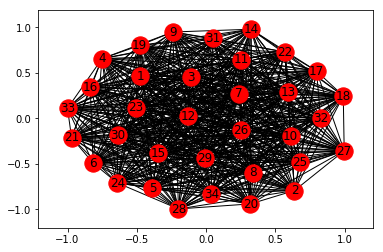

In [3]:
zachar_e_graph = nx.complete_graph(zachar_e)
nx.draw_networkx(zachar_e_graph)

In [4]:
nx.density(zachar_e_graph)

1.0

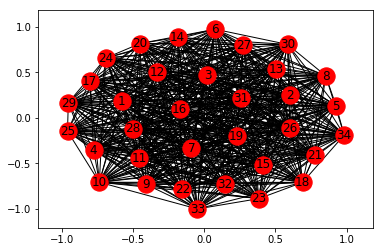

In [5]:
zachar_c_graph = nx.complete_graph(zachar_c)
nx.draw_networkx(zachar_c_graph)

In [6]:
nx.density(zachar_c_graph)

1.0

## Matrix Multiplication

In this exercise, we will be using matrix multiplication. The best way to do that in UCINET is to use the Command Line interface, also known as the Matrix Algebra facility. On the main menu, choose the 'ALG' button (or press Ctrl-G). Once you are there, you can multiply two matrices A and B by typing

->C = prod(A, B)
->dsp C

Commas or spaces or both can be used to separate the A dataset from the B. If the dataset names contain spaces then you need to enclose them in full quotes, as in:

->MyProduct = prod("first dataset", "second dataset")

You will also need to transpose a matrix. In matrix algebra you can do this like this:

->B = Transp(A)

That means, take the matrix in A, transpose the rows and columns, and save the result as a new dataset B. You can also do it from the UCINET main menu by going to Data|Transpose

We will be using the PADGETT dataset. This dataset contains two matrices, PADGM and PADGB. To use them in matrix algebra, we will first need to separate them into different datasets. You can do this in matrix algebra by typing

->padgm = lev(padgett 1)
->padgb = lev(padgett 2)

You can also do this instead:

->unpack padgett

which will automatically create padgm and padgb. 

Or, in the UCINET menu, go to do Data|Unpack. Enter Padgett as the input dataset. Then make sure that "prefix for output files" is set to blank. The press Ok. Both of these procedures will create as output two datasets, called padgm and padgb respectively. Padgm represents marriages ties and padgb represents business ties. 

1. Multiply padgm by padgb (i.e., prod(padgm, padgb)). Call the result mb. 
2. Display the contents of mb. If there is a zero in the (2,6) cell (Albizzi to Ginori), what does that mean? Interpret the 1s, 2s and 3s as well. 
3. Multiply padgb by padgm. Call the results bm. Yes, order matters. Think of mb and bm as two newly measured social relations among these families. What would you call these relations? What does it mean for a family to have the mb relation with another family? How is it different from having the bm relation with the other family?
4. Multiply padgm by padgm and call the result mm. Display mm. How do you interpret the values?
5. Switching datasets, multiply the dataset campnet by its transpose. How do you interpret the values?

## Matrix Algebra

LINKS worksheet - by hand

## 2-mode to 1-mode

Importing a 2-mode dataset

In Excel, open the file called “Aom division membership.xls”. The data are from a survey of 3,324 Academy of Management members, asking them which of 23 divisions of the AOM they belonged to. Highlight all of the data, copy it to the clipboard, and then open Ucinet’s DL editor. Paste in the data, and set the data format to “matrix”. Then press the Save button to save as a ucinet dataset. Call the dataset “membership”. 

Converting to 1-mode

From the Ucinet main menu, go to Data|Affiliations and put in membership as the input dataset. Choose Columns as the mode, and choose sum of cross products as the method. Finally, call the output dataset “comembership”. Results should be this:

You can verify that this matrix is constructed by pre-multiplying the membership matrix by its transpose as follows. From Ucinet’s toolbar, press the CLI button. This opens a command line area. Now type this matrix multiplication command:

->xtx = prod(transp(membership) membership)  //result will be dataset called xtx
->dsp xtx   // result should be same matrix as above

Normalizing

Notice in the matrix that only 7 people belong to both BPS (strategic management division) and CAR (careers division). It is true that researchers interested in corporate strategy tend not to be interested in careers. But we need to be careful: by chance along the overlap between the divisions is likely to be small since one of the divisions is very small (just 130 members). We should correct for the sizes of the different divisions. To do that we rerun Data|Affiliations, but this time choose Bonacich (1972) as the method. This effectively compares the observed overlaps with what you would get by chance, given the different division sizes, and assuming the choice of one division is independent of the choice of another. The results are normalized to run between 0 and 1. Before running it,  make sure to change the output file name to “normcomemb”. Your result should look like the below. Now, all of the numbers are comparable to each as the influence of group size has been filtered out.

A cluster analysis of this matrix yields the following 4-cluster solution:

For those unfamiliar with these divisions, the first cluster consists of divisions that very macro: the unit of analysis is usually the firm. The second cluster consists of super micro divisions, where the unit of analysis is the individual. 